In [1]:
# coding=utf-8
import random, timeit
import pandas as pd

In [2]:


##
# 여기에 세 가지 정렬함수를 위한 코드를...
##

def quick_sort(A, first, last):
    global Qc, Qs
    if first >= last: return A
    left, right = first + 1, last
    pivot = A[first]
    while left <= right:
        init_left, init_right = left, right
        while left <= last and A[left] < pivot:
            left += 1
        while right > first and A[right] > pivot:
            right -= 1
        Qc += (left + right - init_left - init_right + 1)
        if left <= right:
            A[left], A[right] = A[right], A[left]
            Qs += 1
            left += 1;
            right -= 1
    A[first], A[right] = A[right], A[first]
    Qs += 1
    quick_sort(A, first, right - 1)
    quick_sort(A, right + 1, last)

    return A


'''
merge_sort에 대한 각주 - 배열의 원소 개수가 10 - 40 사이의 값일 경우 merge sort 대신 insertion sort을 활용하여 하이브리드 정렬을 하는 것이 효율적을 보여지나,
아래의 경우는 비교 및 교환횟수를 계산하는 기본연산의 횟수가 필요 이상으로 많아져 수행시간이 오래 걸리는 결과를 초래하였기 때문에 merge_sort만 이용하여 정렬되도록 하였습니다.
'''


def mergeSortedLists(A, first, last):
    global Mc, Ms
    mid = (first + last) // 2
    i, j, B = first, mid + 1, []
    while i <= mid and j <= last:
        Mc += 1
        if A[i] <= A[j]:
            B.append(A[i])
            i += 1
        else:
            B.append(A[j])
            j += 1

    for k in range(i, mid + 1):
        B.append(A[k])
    for k in range(j, last + 1):
        B.append(A[k])
    for i in range(first, last + 1):
        A[i] = B[i - first]
        Ms += 1

def merge_sort(A, first, last):
    global Mc, Ms
    if first >= last: return
    mid = (first + last) // 2
    merge_sort(A, first, mid)
    merge_sort(A, mid + 1, last)
    mergeSortedLists(A, first, last)
    return A


def heap_sort(A):
    global Hc, Hs

    def heapify(i, limit=len(A)):  # function for heapify down, A[0] will always be the maximum value
        global Hc, Hs
        while (2 * i) + 1 < limit:
            L, R = (2 * i) + 1, (2 * i) + 2
            if L < limit and A[L] > A[i]:
                m = L
            else:
                m = i
            if R < limit and A[R] > A[m]:
                m = R
            Hc += 2
            if m != i:
                A[i], A[m] = A[m], A[i]
                Hs += 1
                i = m
            else:
                break

    for i in range(len(A) - 1, -1, -1):
        heapify(i)
    # Phase 1: Make an array that satisfies characteristics of Heap data structure

    for i in range(len(A) - 1, 0, -1):  # Phase 2: switch A[0] and A[i] with for loop & heapify again
        A[0], A[i] = A[i], A[0]  # swap
        Hs += 1
        heapify(0, i)

    return A


# 아래 코드는 바꾸지 말 것!
# 직접 실행해보면, 어떤 값이 출력되는지 알 수 있음
#

def check_sorted(A):
    for i in range(n - 1):
        if A[i] > A[i + 1]: return False
    return True


#
# Qc는 quick sort에서 리스트의 두 수를 비교한 횟수 저장
# Qs는 quick sort에서 두 수를 교환(swap)한 횟수 저장
# Mc, Ms는 merge sort에서 비교, 교환(또는 이동) 횟수 저장
# Hc, Hs는 heap sort에서 비교, 교환(또는 이동) 횟수 저장
#




In [3]:
saved_data = pd.DataFrame(columns = ["N", "quickSortTimeComplexity", "quickSort_swap", "quicksort_comparison",
                                    "mergeSortTimeComplexity", "mergeSort_swap", "mergesort_comparison",
                                    "heapSortTimeComplexity", "heapSort_swap", "heapsort_comparison"])


In [20]:
row_count = 0

for n in range(10000, 500000, 5000):
    print("-" * 50)
    print(f"Length of array to be sorted: {n}")
    
    Qc, Qs, Mc, Ms, Hc, Hs = 0, 0, 0, 0, 0, 0
    random.seed()
    A = []
    for i in range(n):
        A.append(random.randint(-1000, 1000))
    B = A[:]
    C = A[:]

    print("")
    print("Quick sort:")
    quicksort_time = timeit.timeit("quick_sort(A, 0, n-1)", globals=globals(), number=1)
    print("time =", quicksort_time)
    print("  comparisons = {:10d}, swaps = {:10d}\n".format(Qc, Qs))
    print("-" * 50)
    print("Merge sort:")
    mergesort_time = timeit.timeit("merge_sort(B, 0, n-1)", globals=globals(), number=1)
    print("time =", mergesort_time)
    print("  comparisons = {:10d}, swaps = {:10d}\n".format(Mc, Ms))
    print("-" * 50)
    print("Heap sort:")
    heapsort_time = timeit.timeit("heap_sort(C)", globals=globals(), number=1)
    print("time =", heapsort_time)
    print("  comparisons = {:10d}, swaps = {:10d}\n".format(Hc, Hs))
    
    
    saved_data.loc[row_count] = [
                                n, quicksort_time, Qs, Qc,
                                mergesort_time, Ms, Mc,
                                heapsort_time, Hs, Hc,
                                ]
    
    # 진짜 정렬되었는지 check한다. 정렬이 되지 않았다면, assert 함수가 fail됨!
    assert (check_sorted(A))
    assert (check_sorted(B))
    assert (check_sorted(C))
    
    n *= 2
    row_count += 1
    

--------------------------------------------------
Length of array to be sorted: 10000

Quick sort:
time = 0.034171673999480845
  comparisons =      20470, swaps =      36543

--------------------------------------------------
Merge sort:
time = 0.06907714599947212
  comparisons =     120420, swaps =     133616

--------------------------------------------------
Heap sort:
time = 0.06968738599971402
  comparisons =     235348, swaps =     124150

--------------------------------------------------
Length of array to be sorted: 15000

Quick sort:
time = 0.045095768999999564
  comparisons =      34297, swaps =      57664

--------------------------------------------------
Merge sort:
time = 0.09766319099981047
  comparisons =     189267, swaps =     208616

--------------------------------------------------
Heap sort:
time = 0.11090615600005549
  comparisons =     370306, swaps =     194870

--------------------------------------------------
Length of array to be sorted: 20000

Quick sort

time = 0.7375789360003182
  comparisons =    1536353, swaps =    1668928

--------------------------------------------------
Heap sort:
time = 1.0233923939995293
  comparisons =    3018710, swaps =    1574370

--------------------------------------------------
Length of array to be sorted: 105000

Quick sort:
time = 0.4381811009998273
  comparisons =     265115, swaps =     541137

--------------------------------------------------
Merge sort:
time = 0.7877223200002845
  comparisons =    1621017, swaps =    1758928

--------------------------------------------------
Heap sort:
time = 1.099231608000082
  comparisons =    3184842, swaps =    1660637

--------------------------------------------------
Length of array to be sorted: 110000

Quick sort:
time = 0.4534287209999093
  comparisons =     237789, swaps =     569216

--------------------------------------------------
Merge sort:
time = 0.9428006110001661
  comparisons =    1704744, swaps =    1848928

-------------------------------


Quick sort:
time = 0.7436658959995839
  comparisons =     721121, swaps =    1092120

--------------------------------------------------
Merge sort:
time = 1.4983234960000118
  comparisons =    3183825, swaps =    3442856

--------------------------------------------------
Heap sort:
time = 1.8798546469997746
  comparisons =    6263878, swaps =    3258863

--------------------------------------------------
Length of array to be sorted: 200000

Quick sort:
time = 0.7690604919998805
  comparisons =     962027, swaps =    1132211

--------------------------------------------------
Merge sort:
time = 1.5544371969999702
  comparisons =    3272396, swaps =    3537856

--------------------------------------------------
Heap sort:
time = 1.9388613739993161
  comparisons =    6438872, swaps =    3349131

--------------------------------------------------
Length of array to be sorted: 205000

Quick sort:
time = 0.7895065480006451
  comparisons =    1085976, swaps =    1162108

-----------------

time = 2.2566602460001377
  comparisons =    4807473, swaps =    5175712

--------------------------------------------------
Heap sort:
time = 2.8706419229993116
  comparisons =    9454354, swaps =    4912209

--------------------------------------------------
Length of array to be sorted: 290000

Quick sort:
time = 1.1751353800000288
  comparisons =    1382146, swaps =    1714782

--------------------------------------------------
Merge sort:
time = 2.310506475000693
  comparisons =    4900248, swaps =    5275712

--------------------------------------------------
Heap sort:
time = 2.9386680549996527
  comparisons =    9635572, swaps =    5005681

--------------------------------------------------
Length of array to be sorted: 295000

Quick sort:
time = 1.1761390559995561
  comparisons =    1391567, swaps =    1745999

--------------------------------------------------
Merge sort:
time = 2.3489512739997735
  comparisons =    4992132, swaps =    5375712

-------------------------------


Quick sort:
time = 1.7755396479997216
  comparisons =    2581043, swaps =    2315479

--------------------------------------------------
Merge sort:
time = 3.856058166999901
  comparisons =    6571166, swaps =    7075712

--------------------------------------------------
Heap sort:
time = 5.114346360000127
  comparisons =   12936054, swaps =    6714430

--------------------------------------------------
Length of array to be sorted: 385000

Quick sort:
time = 1.9957700950008075
  comparisons =    1444644, swaps =    2352085

--------------------------------------------------
Merge sort:
time = 3.6910568319999584
  comparisons =    6663607, swaps =    7175712

--------------------------------------------------
Heap sort:
time = 5.450410976999592
  comparisons =   13121798, swaps =    6810883

--------------------------------------------------
Length of array to be sorted: 390000

Quick sort:
time = 2.140579558999889
  comparisons =    2412627, swaps =    2387453

---------------------

time = 5.368174340000223
  comparisons =   16275246, swaps =    8442413

--------------------------------------------------
Length of array to be sorted: 475000

Quick sort:
time = 2.085871178999696
  comparisons =    2532049, swaps =    2968052

--------------------------------------------------
Merge sort:
time = 4.393907842000772
  comparisons =    8361754, swaps =    8975712

--------------------------------------------------
Heap sort:
time = 6.537862498999857
  comparisons =   16460722, swaps =    8538646

--------------------------------------------------
Length of array to be sorted: 480000

Quick sort:
time = 2.155744376000257
  comparisons =    2859504, swaps =    3017159

--------------------------------------------------
Merge sort:
time = 4.801297074999638
  comparisons =    8457761, swaps =    9075712

--------------------------------------------------
Heap sort:
time = 6.414236610000444
  comparisons =   16648084, swaps =    8635884

-------------------------------------

In [22]:
from matplotlib import pyplot

In [23]:
saved_data

,N,quickSortTimeComplexity,quickSort_swap,quicksort_comparison,mergeSortTimeComplexity,mergeSort_swap,mergesort_comparison,heapSortTimeComplexity,heapSort_swap,heapsort_comparison
0,10000.0,0.034172,36543.0,20470.0,0.069077,133616.0,120420.0,0.069687,124150.0,235348.0
1,15000.0,0.045096,57664.0,34297.0,0.097663,208616.0,189267.0,0.110906,194870.0,370306.0
2,20000.0,0.067346,80600.0,61152.0,0.153541,287232.0,260940.0,0.165187,268279.0,510758.0
3,25000.0,0.092107,105342.0,85239.0,0.171998,367232.0,334179.0,0.212358,343564.0,654944.0
4,30000.0,0.100234,130381.0,95568.0,0.207344,447232.0,408663.0,0.253255,419779.0,800596.0
...,...,...,...,...,...,...,...,...,...,...
93,475000.0,2.085871,2968052.0,2532049.0,4.393908,8975712.0,8361754.0,6.537862,8538646.0,16460722.0
94,480000.0,2.155744,3017159.0,2859504.0,4.801297,9075712.0,8457761.0,6.414237,8635884.0,16648084.0
95,485000.0,2.478021,3043072.0,2323533.0,4.641953,9175712.0,8552349.0,6.414465,8732213.0,16834666.0
96,490000.0,2.566004,3071921.0,2935944.0,4.733363,9275712.0,8646721.0,6.000130,8826344.0,17018938.0


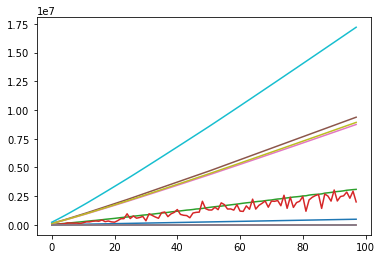

In [24]:
pyplot.plot(saved_data)

AttributeError: 'function' object has no attribute 'show'

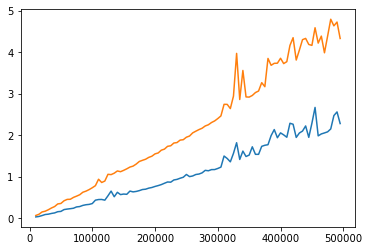

In [25]:
time_complexity = saved_data[["N", "quickSortTimeComplexity", "mergeSortTimeComplexity", "heapSortTimeComplexity"]]

pyplot.plot(saved_data["N"], saved_data["quickSortTimeComplexity"])
pyplot.plot(saved_data["N"], saved_data["mergeSortTimeComplexity"])
pyplot.plot.show()